In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import datetime as dt

%matplotlib inline

In [161]:
members = pd.read_csv('NSS_GreatCare_Members.csv')
admissions = pd.read_csv('NSS_Hospital_Inpatient_Admissions.csv')
pcp = pd.read_csv('NSS_PrimaryCare_Office_Visits.csv')

C:\Users\zrgra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [162]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61519 entries, 0 to 61518
Data columns (total 63 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Patient ID                                                       61519 non-null  object 
 1   Primary Plan ID                                                  61519 non-null  object 
 2   Primary Payor ID                                                 61519 non-null  object 
 3   Is Patient Alive                                                 61519 non-null  int64  
 4   Patient Age Integer                                              61519 non-null  int64  
 5   Patient Date of Birth                                            61519 non-null  object 
 6   Patient ZIP Code 5-Digit                                         61105 non-null  float64
 7   Count Primary Care Visits in Last 36 Mon

In [163]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6213 entries, 0 to 6212
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Encounter ID                                         6213 non-null   object 
 1   Patient ID                                           6213 non-null   object 
 2   Encounter Primary Payor ID                           6213 non-null   object 
 3   Encounter Primary Plan ID                            6213 non-null   object 
 4   Facility Provider ID                                 6213 non-null   object 
 5   Attending Provider ID                                5884 non-null   object 
 6   Attending Provider NPI                               5884 non-null   float64
 7   Facility Provider NPI                                6213 non-null   object 
 8   Encounter Start Date                                 6213 non-null  

In [164]:
pcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231373 entries, 0 to 231372
Data columns (total 18 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Encounter ID                                   231373 non-null  object 
 1   Patient ID                                     231373 non-null  object 
 2   Service Provider ID                            230599 non-null  object 
 3   Attending Provider ID                          39644 non-null   object 
 4   Provider Group Provider ID                     227644 non-null  object 
 5   Facility Provider ID                           39756 non-null   object 
 6   Encounter Primary Payor ID                     231373 non-null  object 
 7   Encounter Primary Plan ID                      231373 non-null  object 
 8   Attending Provider NPI                         39644 non-null   float64
 9   Facility Provider NPI                

In [165]:
members.describe()

,Is Patient Alive,Patient Age Integer,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Group Provider NPI,Primary Payor Description,...,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder
count,61519.0,61519.000000,61105.000000,61519.000000,31839.000000,31896.000000,0.0,3.183900e+04,3.188800e+04,0.0,...,61519.000000,61519.000000,61519.000000,61519.000000,61519.000000,61519.000000,61519.000000,61519.000000,61519.000000,61519.000000
mean,1.0,36.329264,92451.083757,1.572148,1.995509,2.691623,NaN,1.493144e+09,1.186191e+09,NaN,...,0.000455,0.002861,0.001268,0.020108,0.001252,0.006258,0.015898,0.015199,0.000488,0.001756
std,0.0,18.933162,2390.957396,2.492081,1.638456,2.440030,NaN,2.734712e+08,2.150372e+08,NaN,...,0.021329,0.053411,0.035585,0.140370,0.035357,0.078862,0.125080,0.122343,0.022078,0.041863
min,1.0,0.000000,3842.000000,0.000000,1.000000,1.000000,NaN,1.003102e+09,1.003864e+09,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,23.000000,90405.000000,0.000000,1.000000,1.000000,NaN,1.235422e+09,1.043427e+09,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,37.000000,92122.000000,1.000000,1.000000,2.000000,NaN,1.497791e+09,1.164513e+09,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,52.000000,94117.000000,2.000000,2.000000,3.000000,NaN,1.720035e+09,1.184723e+09,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,96.000000,99223.000000,67.000000,40.000000,67.000000,NaN,1.992995e+09,1.992931e+09,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
admissions.describe()

,Attending Provider NPI,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
count,5.884000e+03,6213.000000,6213.000000,6196.000000,6213.000000,5378.000000,6213.0,6.213000e+03,6213.000000
mean,1.483621e+09,0.246419,0.145340,2.168012,3.225173,21.165303,0.0,2.697675e+04,198.706242
std,2.867362e+08,0.430960,0.352472,1.176313,8.695167,2.276582,0.0,5.632597e+04,109.123134
min,1.520000e+02,0.000000,0.000000,1.000000,1.000000,11.000000,0.0,0.000000e+00,0.000000
25%,1.245253e+09,0.000000,0.000000,1.000000,1.000000,21.000000,0.0,7.656000e+03,250.000000
50%,1.467790e+09,0.000000,0.000000,2.000000,1.000000,21.000000,0.0,1.480000e+04,250.000000
75%,1.720043e+09,0.000000,0.000000,3.000000,1.000000,21.000000,0.0,2.495088e+04,250.000000
max,1.992998e+09,1.000000,1.000000,9.000000,90.000000,81.000000,0.0,1.589601e+06,750.000000


In [167]:
pcp.describe()

,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group
count,3.964400e+04,3.975600e+04,2.305990e+05,2.276440e+05,231373.000000,231373.000000,231373.000000,231373.000000
mean,1.512593e+09,1.634380e+09,1.490997e+09,1.176631e+09,0.255618,0.949981,0.159686,0.159686
std,2.832986e+08,3.503427e+08,2.750714e+08,2.112866e+08,0.436209,0.217984,0.366315,0.366315
min,1.003102e+09,0.000000e+00,1.003046e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.285658e+09,1.104842e+09,1.235367e+09,1.043427e+09,0.000000,1.000000,0.000000,0.000000
50%,1.548480e+09,1.902803e+09,1.487848e+09,1.043427e+09,0.000000,1.000000,0.000000,0.000000
75%,1.720009e+09,1.902803e+09,1.720064e+09,1.184723e+09,1.000000,1.000000,0.000000,0.000000
max,1.992914e+09,1.932197e+09,2.000000e+09,1.992931e+09,1.000000,1.000000,1.000000,1.000000


In [168]:
members['Patient Date of Birth'] = pd.to_datetime(members['Patient Date of Birth'], format='%Y-%m-%d')
members['Period Start Date'] = pd.to_datetime(members['Period Start Date'], format='%Y-%m-%d')
members['Period End Date'] = pd.to_datetime(members['Period End Date'], format='%Y-%m-%d')

In [169]:
admissions['Encounter Start Date'] = pd.to_datetime(admissions['Encounter Start Date'], format='%Y-%m-%d')
admissions['Encounter End Date'] = pd.to_datetime(admissions['Encounter End Date'], format='%Y-%m-%d')

In [170]:
pcp['Encounter Date'] = pd.to_datetime(pcp['Encounter Date'], format='%Y-%m-%d')

In [171]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61519 entries, 0 to 61518
Data columns (total 63 columns):
 #   Column                                                           Non-Null Count  Dtype              
---  ------                                                           --------------  -----              
 0   Patient ID                                                       61519 non-null  object             
 1   Primary Plan ID                                                  61519 non-null  object             
 2   Primary Payor ID                                                 61519 non-null  object             
 3   Is Patient Alive                                                 61519 non-null  int64              
 4   Patient Age Integer                                              61519 non-null  int64              
 5   Patient Date of Birth                                            61519 non-null  datetime64[ns]     
 6   Patient ZIP Code 5-Digit              

In [172]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6213 entries, 0 to 6212
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Encounter ID                                         6213 non-null   object        
 1   Patient ID                                           6213 non-null   object        
 2   Encounter Primary Payor ID                           6213 non-null   object        
 3   Encounter Primary Plan ID                            6213 non-null   object        
 4   Facility Provider ID                                 6213 non-null   object        
 5   Attending Provider ID                                5884 non-null   object        
 6   Attending Provider NPI                               5884 non-null   float64       
 7   Facility Provider NPI                                6213 non-null   object        
 8 

In [173]:
pcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231373 entries, 0 to 231372
Data columns (total 18 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   Encounter ID                                   231373 non-null  object        
 1   Patient ID                                     231373 non-null  object        
 2   Service Provider ID                            230599 non-null  object        
 3   Attending Provider ID                          39644 non-null   object        
 4   Provider Group Provider ID                     227644 non-null  object        
 5   Facility Provider ID                           39756 non-null   object        
 6   Encounter Primary Payor ID                     231373 non-null  object        
 7   Encounter Primary Plan ID                      231373 non-null  object        
 8   Attending Provider NPI                      

# Problem 1: Readmission Rates

In [174]:
#admissions['patient_adm_ct'] = admissions.groupby('Patient ID')['Encounter Start Date'].transform('rank')

In [175]:
#code by joshua
#days_till_readmission = []
#for index, row in admissions.iterrows():
    #if row['patient_adm_ct'] == 1:
       # readm_time = pd.to_datetime(None)
    #else:
        #readm_time = row['Encounter Start Date'] - admissions[(hsp_in_adm['Patient ID'] == row['Patient ID'])
                                #&
                                #(hsp_in_adm['patient_adm_ct'] == row['patient_adm_ct']-1)]['Encounter End Date']
    #days_till_readmission.append(readm_time)
    
#days_till_readmission    
# admissions['days_till_readmission'] = days_till_readmission
# admissions['days_till_readmission'] = admissions['days_till_readmission'].dt.days
# print(admissions['days_till_readmission'])

In [176]:
readmissions = admissions[['Patient ID','Encounter ID','Facility Provider ID','Encounter Start Date','Encounter End Date']]

In [177]:
readmissions

,Patient ID,Encounter ID,Facility Provider ID,Encounter Start Date,Encounter End Date
0,DS1|10033,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|NPI|1306890389,2013-01-12,2013-01-14
1,DS1|10043,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|NPI|1902803315,2014-01-05,2014-01-12
2,DS1|10073,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|NPI|1902803315,2012-06-13,2012-06-21
3,DS1|10101,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|NPI|1427055839,2012-12-06,2012-12-09
4,DS1|10118,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|NPI|1992818256,2015-03-11,2015-03-14
...,...,...,...,...,...
6208,DS1|9979,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|NPI|1689772592,2015-02-06,2015-02-11
6209,DS1|9981,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|NPI|1427055839,2014-08-07,2014-08-10
6210,DS1|9994,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|NPI|1689608150,2015-11-21,2015-11-23
6211,DS1|9994,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|NPI|1689608150,2015-11-24,2015-11-27


In [178]:
readmissions['Next Admission'] = readmissions.sort_values(by = ['Encounter Start Date'], ascending = True).groupby(['Patient ID'])['Encounter Start Date'].shift(-1)

<ipython-input-178-66fbe6bfb372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmissions['Next Admission'] = readmissions.sort_values(by = ['Encounter Start Date'], ascending = True).groupby(['Patient ID'])['Encounter Start Date'].shift(-1)


In [179]:
readmissions['Difference'] = readmissions['Next Admission'] - readmissions['Encounter End Date']
readmissions

<ipython-input-179-9495db2b8602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmissions['Difference'] = readmissions['Next Admission'] - readmissions['Encounter End Date']


,Patient ID,Encounter ID,Facility Provider ID,Encounter Start Date,Encounter End Date,Next Admission,Difference
0,DS1|10033,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT
1,DS1|10043,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|NPI|1902803315,2014-01-05,2014-01-12,NaT,NaT
2,DS1|10073,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|NPI|1902803315,2012-06-13,2012-06-21,NaT,NaT
3,DS1|10101,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|NPI|1427055839,2012-12-06,2012-12-09,NaT,NaT
4,DS1|10118,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|NPI|1992818256,2015-03-11,2015-03-14,NaT,NaT
...,...,...,...,...,...,...,...
6208,DS1|9979,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|NPI|1689772592,2015-02-06,2015-02-11,NaT,NaT
6209,DS1|9981,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|NPI|1427055839,2014-08-07,2014-08-10,NaT,NaT
6210,DS1|9994,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|NPI|1689608150,2015-11-21,2015-11-23,2015-11-24,1 days
6211,DS1|9994,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT


In [180]:
#readmits = admissions[['Patient ID', 'patient_adm_ct', 'Encounter End Date']]

In [181]:
#readmits['patient_adm_ct'] += 1

In [182]:
#readmissions = pd.merge(admissions, readmits, how = 'left', on = ['Patient ID', 'patient_adm_ct'], suffixes = ('', ' Last'))

In [183]:
#readmissions['Days Between Readmission'] = readmissions['Encounter Start Date'] - readmissions['Encounter End Date Last']

In [184]:
#readmissions['Under 30 Days'] = (readmissions['Days Between Readmission'] >= dt.timedelta(days = 0)) & (readmissions['Days Between Readmission'] <= dt.timedelta(days = 30))

In [185]:
readmitted = readmissions.dropna()
readmissions

,Patient ID,Encounter ID,Facility Provider ID,Encounter Start Date,Encounter End Date,Next Admission,Difference
0,DS1|10033,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT
1,DS1|10043,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|NPI|1902803315,2014-01-05,2014-01-12,NaT,NaT
2,DS1|10073,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|NPI|1902803315,2012-06-13,2012-06-21,NaT,NaT
3,DS1|10101,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|NPI|1427055839,2012-12-06,2012-12-09,NaT,NaT
4,DS1|10118,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|NPI|1992818256,2015-03-11,2015-03-14,NaT,NaT
...,...,...,...,...,...,...,...
6208,DS1|9979,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|NPI|1689772592,2015-02-06,2015-02-11,NaT,NaT
6209,DS1|9981,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|NPI|1427055839,2014-08-07,2014-08-10,NaT,NaT
6210,DS1|9994,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|NPI|1689608150,2015-11-21,2015-11-23,2015-11-24,1 days
6211,DS1|9994,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT


In [186]:
readmitted = readmitted.sort_values('Encounter Start Date')
readmitted

,Patient ID,Encounter ID,Facility Provider ID,Encounter Start Date,Encounter End Date,Next Admission,Difference
77,DS1|10734,HIA|DS1|10734|DS1|NPI|1104982917|1,DS1|NPI|1104982917,2009-11-11,2009-11-25,2010-04-25,151 days
3367,DS1|39675,HIA|DS1|39675|DS1|NPI|1184722779|1,DS1|NPI|1184722779,2009-11-24,2010-11-30,2011-01-17,48 days
1304,DS1|21571,HIA|DS1|21571|DS1|NPI|1689608150|1,DS1|NPI|1689608150,2009-11-27,2009-12-02,2010-02-20,80 days
2612,DS1|3294,HIA|DS1|3294|DS1|NPI|1710065933|1,DS1|NPI|1710065933,2009-11-28,2009-12-08,2010-01-01,24 days
4982,DS1|53976,HIA|DS1|53976|DS1|NPI|1689772592|1,DS1|NPI|1689772592,2009-11-29,2009-12-01,2009-12-28,27 days
...,...,...,...,...,...,...,...
4642,DS1|51247,HIA|DS1|51247|DS1|NPI|1184722779|1,DS1|NPI|1184722779,2018-07-16,2018-07-21,2019-04-09,262 days
5899,DS1|6964,HIA|DS1|6964|DS1|NPI|1184722779|1,DS1|NPI|1184722779,2018-07-21,2018-11-18,2018-07-21,-120 days
5898,DS1|6964,HIA|DS1|6964|DS1|NPI|0000000000|1,DS1|NPI|0000000000,2018-07-21,2018-09-18,2018-11-23,66 days
922,DS1|18117,HIA|DS1|18117|DS1|NPI|1033298617|1,DS1|NPI|1033298617,2018-08-08,2018-08-11,2018-08-08,-3 days


In [187]:
readmitted = readmitted[readmitted['Difference'] >= '0 days'] 

In [188]:
readmitted_month = readmitted[readmitted['Difference'] <= '30 days']
readmitted_month

,Patient ID,Encounter ID,Facility Provider ID,Encounter Start Date,Encounter End Date,Next Admission,Difference
2612,DS1|3294,HIA|DS1|3294|DS1|NPI|1710065933|1,DS1|NPI|1710065933,2009-11-28,2009-12-08,2010-01-01,24 days
4982,DS1|53976,HIA|DS1|53976|DS1|NPI|1689772592|1,DS1|NPI|1689772592,2009-11-29,2009-12-01,2009-12-28,27 days
3804,DS1|43565,HIA|DS1|43565|DS1|NPI|1801152566|1,DS1|NPI|1801152566,2009-12-09,2009-12-17,2009-12-30,13 days
3166,DS1|37954,HIA|DS1|37954|DS1|NPI|1689772592|1,DS1|NPI|1689772592,2009-12-16,2009-12-23,2009-12-23,0 days
3169,DS1|37954,HIA|DS1|37954|DS1|NPI|1871543215|1,DS1|NPI|1871543215,2009-12-23,2010-01-29,2010-02-16,18 days
...,...,...,...,...,...,...,...
1864,DS1|25963,HIA|DS1|25963|DS1|NPI|1992818256|1,DS1|NPI|1992818256,2017-09-10,2017-09-14,2017-09-15,1 days
3608,DS1|41795,HIA|DS1|41795|DS1|NPI|1902803315|2,DS1|NPI|1902803315,2017-12-25,2018-01-07,2018-01-31,24 days
279,DS1|12364,HIA|DS1|12364|DS1|NPI|1184722779|3,DS1|NPI|1184722779,2018-03-13,2018-03-18,2018-04-04,17 days
280,DS1|12364,HIA|DS1|12364|DS1|NPI|1184722779|4,DS1|NPI|1184722779,2018-04-04,2018-04-11,2018-05-02,21 days


# Problem 2: PCP

In [189]:
pcp_clean = pcp[['Encounter ID','Patient ID','Service Provider NPI','Provider Group NPI','Encounter Date']]

In [190]:
pcp_clean

,Encounter ID,Patient ID,Service Provider NPI,Provider Group NPI,Encounter Date
0,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779,DS1|10076,1.487857e+09,1.043427e+09,2011-02-18
1,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996,DS1|10088,1.528031e+09,1.043427e+09,2014-02-22
2,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365,DS1|10165,1.477579e+09,1.043427e+09,2014-08-31
3,COV|EE|DS1|10240|20130624|DS1|NPI|1821178088,DS1|10240,1.821178e+09,1.407059e+09,2013-06-17
4,COV|EE|DS1|10293|20160904|DS1|NPI|1609004191,DS1|10293,1.609004e+09,1.184723e+09,2016-09-04
...,...,...,...,...,...
231368,COV|PCSL|DS1|9999|P|91236|1184722779|1,DS1|9999,1.851738e+09,1.184723e+09,2015-02-10
231369,COV|PCSL|DS1|99|P|1263621|1043427248|1,DS1|99,1.215163e+09,1.043427e+09,2011-08-02
231370,COV|PCSL|DS1|99|P|22491|1043427248|1,DS1|99,1.215163e+09,1.043427e+09,2011-04-13
231371,COV|PCSL|DS1|9|P|341904|1962790014|1,DS1|9,1.144252e+09,1.962790e+09,2014-04-07


In [191]:
admissions_clean = admissions[['Patient ID','Encounter End Date']]

In [192]:
admissions_clean

,Patient ID,Encounter End Date
0,DS1|10033,2013-01-14
1,DS1|10043,2014-01-12
2,DS1|10073,2012-06-21
3,DS1|10101,2012-12-09
4,DS1|10118,2015-03-14
...,...,...
6208,DS1|9979,2015-02-11
6209,DS1|9981,2014-08-10
6210,DS1|9994,2015-11-23
6211,DS1|9994,2015-11-27


In [193]:
pcp_adm = admissions_clean.merge(pcp_clean, left_on ='Patient ID', right_on = 'Patient ID', how = 'left')

In [194]:
pcp_adm

,Patient ID,Encounter End Date,Encounter ID,Service Provider NPI,Provider Group NPI,Encounter Date
0,DS1|10033,2013-01-14,COV|PBSL|DS1|10033|P|1228384|1043427248|1|SHIFTED,1.619980e+09,1.043427e+09,2015-12-08
1,DS1|10033,2013-01-14,COV|PBSL|DS1|10033|P|1326684|1043427248|1|SHIFTED,1.225216e+09,1.043427e+09,2012-06-18
2,DS1|10033,2013-01-14,COV|PBSL|DS1|10033|P|155317|1043427248|1|SHIFTED,1.619980e+09,1.043427e+09,2014-06-10
3,DS1|10033,2013-01-14,COV|PBSL|DS1|10033|P|439093|1043427248|1|SHIFTED,1.366453e+09,1.043427e+09,2014-09-28
4,DS1|10033,2013-01-14,COV|PBSL|DS1|10033|P|711310|1043427248|1|SHIFTED,1.619980e+09,1.043427e+09,2014-03-16
...,...,...,...,...,...,...
44093,DS1|9994,2015-11-27,COV|PCSL|DS1|9994|P|1238517|1407058787|2,1.487735e+09,1.407059e+09,2015-12-05
44094,DS1|9994,2015-11-27,COV|PCSL|DS1|9994|P|302749|1407058787|2,1.487735e+09,1.407059e+09,2015-12-13
44095,DS1|9994,2015-11-27,COV|PCSL|DS1|9994|P|781849|1205884392|1,1.669553e+09,1.205884e+09,2014-05-18
44096,DS1|9994,2015-11-27,COV|PCSL|DS1|9994|P|93182|1043427248|1,1.508895e+09,1.043427e+09,2013-07-20


In [195]:
pcp_adm['Days Until PCP Visit'] = pcp_adm['Encounter Date'] - pcp_adm['Encounter End Date']

In [196]:
pcp_week = pcp_adm[pcp_adm['Days Until PCP Visit'] <= '7 days']

In [197]:
pcp_week = pcp_week[pcp_week['Days Until PCP Visit'] >= '0 days']

In [198]:
pcp_week = pcp_week.drop_duplicates(subset = ['Patient ID', 'Encounter End Date'], keep = 'first')

In [199]:
pcp_week

,Patient ID,Encounter End Date,Encounter ID,Service Provider NPI,Provider Group NPI,Encounter Date,Days Until PCP Visit
17,DS1|10043,2014-01-12,COV|PBSL|DS1|10043|P|538933|1043427248|1|SHIFTED,1.619200e+09,1.043427e+09,2014-01-12,0 days
28,DS1|10073,2012-06-21,COV|PBSL|DS1|10073|P|301709|1043427248|1|SHIFTED,1.659394e+09,1.043427e+09,2012-06-27,6 days
50,DS1|10101,2012-12-09,COV|PCSL|DS1|10101|P|1189971|1043427248|1,1.952538e+09,1.043427e+09,2012-12-12,3 days
231,DS1|10303,2012-06-24,COV|PBSL|DS1|10303|P|10896|1912987553|1,1.447235e+09,1.912988e+09,2012-06-30,6 days
247,DS1|10305,2014-05-12,COV|PBSL|DS1|10305|P|823298|1184722779|1,1.417113e+09,1.184723e+09,2014-05-13,1 days
...,...,...,...,...,...,...,...
44039,DS1|9943,2014-10-30,COV|PCSL|DS1|9943|P|1315984|1184722779|1,1.659330e+09,1.184723e+09,2014-11-03,4 days
44051,DS1|9945,2013-02-11,COV|PCSL|DS1|9945|P|840374|1043427248|1,1.164698e+09,1.043427e+09,2013-02-14,3 days
44067,DS1|9978,2015-09-05,COV|PCSL|DS1|9978|P|696226|1043427248|1,1.144275e+09,1.043427e+09,2015-09-11,6 days
44071,DS1|9979,2015-02-11,COV|PCSL|DS1|9979|P|281365|1477666352|1,1.740278e+09,1.477666e+09,2015-02-15,4 days


In [200]:
pcp_visit_rate = ((pcp_week['Patient ID'].count())/(admissions[admissions.columns[0]].count())*100)

In [201]:
round(pcp_visit_rate,2)

29.99

# Problem 3 

In [202]:
admissions.groupby(['Facility Provider ID']).count().sort_values('Encounter ID', ascending = False)

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
Facility Provider ID,,,,,,,,,,,,,,,,,,,,,
DS1|NPI|1902803315,1204,1204,1204,1204,1185,1185,1204,1204,1204,1204,...,1172,1204,1157,324,322,880,872,1204,1204,1204
DS1|NPI|1184722779,1196,1196,1196,1196,1085,1085,1196,1196,1196,1196,...,1128,1196,1144,295,290,901,887,1196,1196,1196
DS1|NPI|1427055839,889,889,889,889,872,872,889,889,889,889,...,877,889,864,243,242,646,643,889,889,889
DS1|NPI|1689772592,679,679,679,679,655,655,679,679,679,679,...,657,679,650,291,287,388,381,679,679,679
DS1|NPI|1033298617,460,460,460,460,460,460,460,460,460,460,...,460,460,46,0,0,452,452,460,460,460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DS1|NPI|1679659585,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,1,1,1
DS1|NPI|1669456299,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1
DS1|NPI|1659538858,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1


# Deep Dive Topics
1. Readmitted within 0 Days
2. Diagnoses of patients readmitted in under 30
3. Patients with no assigned PCP or no recent visit
4. frequent fliers

In [203]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61519 entries, 0 to 61518
Data columns (total 63 columns):
 #   Column                                                           Non-Null Count  Dtype              
---  ------                                                           --------------  -----              
 0   Patient ID                                                       61519 non-null  object             
 1   Primary Plan ID                                                  61519 non-null  object             
 2   Primary Payor ID                                                 61519 non-null  object             
 3   Is Patient Alive                                                 61519 non-null  int64              
 4   Patient Age Integer                                              61519 non-null  int64              
 5   Patient Date of Birth                                            61519 non-null  datetime64[ns]     
 6   Patient ZIP Code 5-Digit              

In [204]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6213 entries, 0 to 6212
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Encounter ID                                         6213 non-null   object        
 1   Patient ID                                           6213 non-null   object        
 2   Encounter Primary Payor ID                           6213 non-null   object        
 3   Encounter Primary Plan ID                            6213 non-null   object        
 4   Facility Provider ID                                 6213 non-null   object        
 5   Attending Provider ID                                5884 non-null   object        
 6   Attending Provider NPI                               5884 non-null   float64       
 7   Facility Provider NPI                                6213 non-null   object        
 8 

In [205]:
admissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,...,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,...,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,...,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,...,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0
4,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,1.518046e+09,1992818256,2015-03-11,2015-03-14,...,2,1,NaN,NaN,NaN,F32.9,"Major depressive disorder, single episode, uns...",0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,...,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,...,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,...,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,...,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0


In [206]:
mem_adm = pd.merge(members, admissions, how='left', left_on = ['Patient ID'], right_on = ['Patient ID'])
mem_adm

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,...,1,1.0,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0.0,29219.0,250.0
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008.0,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63026,DS1|9995,DS1|5047W,DS1|1,1,47,1963-07-26,92104.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63027,DS1|9996,DS1|5047X,DS1|1,1,26,1983-04-17,94122.0,0,NaN,NaN,...,2,1.0,NaN,NaN,NaN,O86.12,Endometritis following delivery,0.0,0.0,0.0
63028,DS1|9997,DS1|5047W,DS1|1,1,4,2008-12-11,92840.0,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63029,DS1|9998,DS1|5047X,DS1|1,1,63,1954-05-23,94939.0,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
mem_adm2 = mem_adm[['Patient ID','Encounter Start Date',]]

In [208]:
frequent = mem_adm2.groupby(['Patient ID']).count()

In [209]:
frequent.sort_values('Encounter Start Date', ascending = False)

,Encounter Start Date
Patient ID,
DS1|3812,17
DS1|26751,15
DS1|53241,13
DS1|10451,12
DS1|24041,11
...,...
DS1|29196,0
DS1|29197,0
DS1|29198,0


In [210]:
frequent = frequent[frequent['Encounter Start Date'] > 4]

In [211]:
frequent.sort_values('Encounter Start Date', ascending = False)

,Encounter Start Date
Patient ID,
DS1|3812,17
DS1|26751,15
DS1|53241,13
DS1|10451,12
DS1|12422,11
...,...
DS1|31199,5
DS1|10707,5
DS1|33880,5


Text(0, 0.5, 'Patient ID')

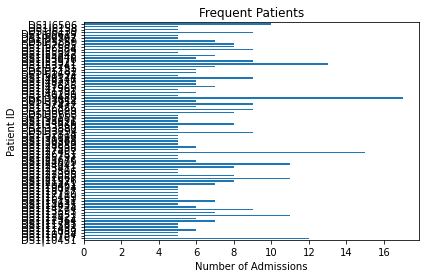

In [212]:
ax = frequent.plot.barh(rot=0, legend=False)
plt.title("Frequent Patients")
plt.xlabel("Number of Admissions")
plt.ylabel("Patient ID")

In [213]:
admissions.loc[admissions['Patient ID'] == 'DS1|24041']

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
1636,HIA|DS1|24041|DS1|NPI|1427055839|1,DS1|24041,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1932307808,1.932308e+09,1427055839,2011-04-22,2011-04-29,...,1,6,21.0,008.45,Intestinal infection due to Clostridium difficile,NaN,NaN,0,37900.00,250.00
1637,HIA|DS1|24041|DS1|NPI|1427055839|2,DS1|24041,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1679541775,1.679542e+09,1427055839,2011-08-09,2011-08-12,...,1,3,21.0,584.9,"Acute kidney failure, unspecified",NaN,NaN,0,17000.79,17.01
1638,HIA|DS1|24041|DS1|NPI|1427055839|3,DS1|24041,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1942369152,1.942369e+09,1427055839,2011-08-27,2011-09-01,...,D,3,21.0,572.2,Hepatic encephalopathy,NaN,NaN,0,27250.00,0.00
1639,HIA|DS1|24041|DS1|NPI|1427055839|4,DS1|24041,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1679541775,1.679542e+09,1427055839,2011-11-21,2011-11-28,...,1,3,23.0,NaN,NaN,K70.31,Alcoholic cirrhosis of liver with ascites,0,46917.80,0.00
1640,HIA|DS1|24041|DS1|NPI|1427055839|5,DS1|24041,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1417061797,1.417062e+09,1427055839,2012-01-02,2012-01-07,...,1,3,23.0,NaN,NaN,E87.1,Hypo-osmolality and hyponatremia,0,27917.80,0.00
1641,HIA|DS1|24041|DS1|NPI|1427055839|6,DS1|24041,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1053358127,1.053358e+09,1427055839,2012-03-05,2012-03-06,...,1,6,NaN,NaN,NaN,N39.0,"Urinary tract infection, site not specified",0,5200.00,250.00
1642,HIA|DS1|24041|DS1|NPI|1467459776|1,DS1|24041,DS1|1,DS1|5047W,DS1|NPI|1467459776,DS1|NPI|1366717563,1.366718e+09,1467459776,2012-04-03,2012-04-08,...,1,1,21.0,NaN,NaN,N39.0,"Urinary tract infection, site not specified",0,21095.00,250.00
1643,HIA|DS1|24041|DS1|NPI|1467459776|2,DS1|24041,DS1|1,DS1|5047W,DS1|NPI|1467459776,DS1|NPI|1659663979,1.659664e+09,1467459776,2012-04-24,2012-05-01,...,1,3,21.0,NaN,NaN,N39.0,"Urinary tract infection, site not specified",0,29633.00,250.00
1644,HIA|DS1|24041|DS1|NPI|1467459776|3,DS1|24041,DS1|1,DS1|5047W,DS1|NPI|1467459776,DS1|NPI|1811123151,1.811123e+09,1467459776,2012-06-21,2012-07-04,...,2,3,21.0,NaN,NaN,K70.40,Alcoholic hepatic failure without coma,0,55422.00,75.00
1645,HIA|DS1|24041|DS1|NPI|1902803315|1,DS1|24041,DS1|1,DS1|5047W,DS1|NPI|1902803315,DS1|NPI|1013113679,1.013114e+09,1902803315,2011-03-03,2011-03-09,...,1,3,21.0,571.2,Alcoholic cirrhosis of liver,NaN,NaN,0,40550.00,250.00


In [215]:
frequent.head(10).sort_values('Encounter Start Date', ascending = False)

,Encounter Start Date
Patient ID,
DS1|10451,12
DS1|12422,11
DS1|11785,7
DS1|12651,7
DS1|11089,6
DS1|12364,6
DS1|10707,5
DS1|10734,5
DS1|11433,5
